# Setup env

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
from collections import Counter
import demjson

In [2]:
from statannot import add_stat_annotation

In [3]:
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
#import scirpy

In [4]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [5]:
file_list_all=['BC09_TUMOR1', 'BC09_TUMOR2', 'BC10_TUMOR1', 'CPIc_C1', 'CPIc_C2',
       'CPIc_C3','CPIc_C4','CPIc_C5','Salmonella_timecourse','KP','KPL_BGB','KPL_Com','KPL_CTR','KPL_PD1']

In [6]:
file_SE_list=['BC09_TUMOR2','BC10_TUMOR1','BC09_TUMOR1','Salmonella_timecourse']

In [7]:
file_list_human=['BC09_TUMOR1', 'BC09_TUMOR2', 'BC10_TUMOR1', 'CPIc_C1', 'CPIc_C2',
       'CPIc_C3','CPIc_C4','CPIc_C5']

In [8]:
file_PE_list_human=['CPIc_C5','CPIc_C4','CPIc_C3','CPIc_C2','CPIc_C1']

In [9]:
file_SE_list_human=['BC09_TUMOR2','BC10_TUMOR1','BC09_TUMOR1']

In [10]:
file_list_mouse=['Salmonella_timecourse','KP','KPL_BGB','KPL_Com','KPL_CTR','KPL_PD1']

In [11]:
file_PE_list_mouse=['KP','KPL_BGB','KPL_Com','KPL_CTR','KPL_PD1']

In [12]:
file_SE_list_mouse=['Salmonella_timecourse']

In [13]:
sample_info_df=pd.read_csv("./Statistic_results/sample_info.txt",sep="\t")

In [14]:
software_info_df=pd.read_csv("./Statistic_results/software_info.txt",sep="\t")

In [15]:
from matplotlib.patches import PathPatch
def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])
                        

In [16]:
TRBJ_SEQUENCE = {
    'TRBJ1-1': 'NTEAFFGQGTRLTVV',
    'TRBJ1-2': 'NYGYTFGSGTRLTVV',
    'TRBJ1-3': 'SGNTIYFGEGSWLTVV',
    'TRBJ1-4': 'TNEKLFFGSGTQLSVL',
    'TRBJ1-5': 'SNQPQHFGDGTRLSIL',
    'TRBJ1-6': 'SYNSPLHFGNGTRLTVT',
    'TRBJ2-1': 'SYNEQFFGPGTRLTVL',
    'TRBJ2-2': 'NTGELFFGEGSRLTVL',
    'TRBJ2-3': 'STDTQYFGPGTRLTVL',
    'TRBJ2-4': 'AKTNIQYFGAGTRLSVL',
    'TRBJ2-5': 'QETQYFGPGTRLLVL',
    'TRBJ2-6': 'SGANVLTFGAGSRLTVL',
    'TRBJ2-7': 'SYEQYFGPGTRLTVT'
}


TRAJ_SEQUENCE = {
    'TRAJ1': 'YESITSQLQFGKGTRVSTSP',
    'TRAJ2': 'NTGGTIDKLTFGKGTHVFIIS',
    'TRAJ3': 'GYSSASKIIFGSGTRLSIRP',
    'TRAJ4': 'FSGGYNKLIFGAGTRLAVHP',
    'TRAJ5': 'DTGRRALTFGSGTRLQVQP',
    'TRAJ6': 'ASGGSYIPTFGRGTSLIVHP',
    'TRAJ7': 'DYGNNRLAFGKGNQVVVIP',
    'TRAJ8': 'NTGFQKLVFGTGTRLLVSP',
    'TRAJ9': 'GNTGGFKTIFGAGTRLFVKA',
    'TRAJ10': 'ILTGGGNKLTFGTGTQLKVEL',
    'TRAJ11': 'NSGYSTLTFGKGTMLLVSP',
    'TRAJ12': 'MDSSYKLIFGSGTRLLVRP',
    'TRAJ13': 'NSGGYQKVTFGIGTKLQVIP',
    'TRAJ14': 'IYSTFIFGSGTRLSVKP',
    'TRAJ15': 'NQAGTALIFGKGTTLSVSS',
    'TRAJ16': 'FSDGQKLLFARGTMLKVDL',
    'TRAJ17': 'IKAAGNKLTFGGGTRVLVKP',
    'TRAJ18': 'DRGSTLGRLYFGRGTQLTVWP',
    'TRAJ19': 'YQRFYNFTFGKGSKHNVTP',
    'TRAJ20': 'SNDYKLSFGAGTTVTVRA',
    'TRAJ21': 'YNFNKFYFGSGTKLNVKP',
    'TRAJ22': 'SSGSARQLTFGSGTQLTVLP',
    'TRAJ23': 'IYNQGGKLIFGQGTELSVKP',
    'TRAJ24': 'TTDSWGKFEFGAGTQVVVTP',
    'TRAJ25': 'EGQGFSFIFGKGTRLLVKP',
    'TRAJ26': 'DNYGQNFVFGPGTRLSVLP',
    'TRAJ27': 'NTNAGKSTFGDGTTLTVKP',
    'TRAJ28': 'YSGAGSYQLTFGKGTKLSVIP',
    'TRAJ29': 'NSGNTPLVFGKGTRLSVIA',
    'TRAJ30': 'NRDDKIIFGKGTRLHILP',
    'TRAJ31': 'NNNARLMFGDGTQLVVKP',
    'TRAJ32': 'NYGGATNKLIFGTGTLLAVQP',
    'TRAJ33': 'DSNYQLIWGAGTKLIIKP',
    'TRAJ34': 'SYNTDKLIFGTGTRLQVFP',
    'TRAJ35': 'IGFGNVLHCGSGTQVIVLP',
    'TRAJ36': 'QTGANNLFFGTGTRLTVIP',
    'TRAJ37': 'GSGNTGKLIFGQGTTLQVKP',
    'TRAJ38': 'NAGNNRKLIWGLGTSLAVNP',
    'TRAJ39': 'NNNAGNMLTFGGGTRLMVKP',
    'TRAJ40': 'TTSGTYKYIFGTGTRLKVLA',
    'TRAJ41': 'NSNSGYALNFGKGTSLLVTP',
    'TRAJ42': 'NYGGSQGNLIFGKGTKLSVKP',
    'TRAJ43': 'NNNDMRFGAGTRLTVKP',
    'TRAJ44': 'NTGTASKLTFGTGTRLQVTL',
    'TRAJ45': 'YSGGGADGLTFGKGTHLIIQP',
    'TRAJ46': 'KKSSGDKLTFGTGTRLAVRP',
    'TRAJ47': 'EYGNKLVFGAGTILRVKS',
    'TRAJ48': 'SNFGNEKLTFGTGTRLTIIP',
    'TRAJ49': 'NTGNQFYFGTGTSLTVIP',
    'TRAJ50': 'KTSYDKVIFGPGTSLSVIP',
    'TRAJ51': 'MRDSYEKLIFGKET*LTVKP',
    'TRAJ52': 'NAGGTSYGKLTFGQGTILTVHP',
    'TRAJ53': 'NSGGSNYKLTFGKGTLLTVNP',
    'TRAJ54': 'IQGAQKLVFGQGTRLTINP',
    'TRAJ55': 'KCW*CSCWGKGMSTKINP',
    'TRAJ56': 'YTGANSKLTFGKGITLSVRP',
    'TRAJ57': 'TQGGSEKLVFGKGTKLTVNP',
    'TRAJ58': 'ETSGSRLTFGEGTQLTVNP',
    'TRAJ59': 'KEGNRKFTFGMGTQVRVKL',
    'TRAJ60': 'KIT*MLNFGKGTELIVSL',
    'TRAJ61': 'YRVNRKLTFGANTRGIMKL',
}
TRAJ_SEQUENCE_END = {
    'TRAJ1': 'F',
    'TRAJ2': 'F',
    'TRAJ3': 'F',
    'TRAJ4': 'F',
    'TRAJ5': 'F',
    'TRAJ6': 'F',
    'TRAJ7': 'F',
    'TRAJ8': 'F',
    'TRAJ9': 'F',
    'TRAJ10': 'F',
    'TRAJ11': 'F',
    'TRAJ12': 'F',
    'TRAJ13': 'F',
    'TRAJ14': 'F',
    'TRAJ15': 'F',
    'TRAJ16': 'F',
    'TRAJ17': 'F',
    'TRAJ18': 'F',
    'TRAJ19': 'F',
    'TRAJ20': 'F',
    'TRAJ21': 'F',
    'TRAJ22': 'F',
    'TRAJ23': 'F',
    'TRAJ24': 'F',
    'TRAJ25': 'F',
    'TRAJ26': 'F',
    'TRAJ27': 'F',
    'TRAJ28': 'F',
    'TRAJ29': 'F',
    'TRAJ30': 'F',
    'TRAJ31': 'F',
    'TRAJ32': 'F',
    'TRAJ33': 'W',
    'TRAJ34': 'F',
    'TRAJ35': 'F',
    'TRAJ36': 'F',
    'TRAJ37': 'F',
    'TRAJ38': 'W',
    'TRAJ39': 'F',
    'TRAJ40': 'F',
    'TRAJ41': 'F',
    'TRAJ42': 'F',
    'TRAJ43': 'F',
    'TRAJ44': 'F',
    'TRAJ45': 'F',
    'TRAJ46': 'F',
    'TRAJ47': 'F',
    'TRAJ48': 'F',
    'TRAJ49': 'F',
    'TRAJ50': 'F',
    'TRAJ51': 'F',
    'TRAJ52': 'F',
    'TRAJ53': 'F',
    'TRAJ54': 'F',
    'TRAJ55': 'W',
    'TRAJ56': 'F',
    'TRAJ57': 'F',
    'TRAJ58': 'F',
    'TRAJ59': 'F',
    'TRAJ60': 'F',
    'TRAJ61': 'F',
}

def fill_up_alpha_cdr3(cdr3: str, j_gene: str):
    sequence_1 = TRAJ_SEQUENCE[j_gene]
    sequence_2 = cdr3
    end=TRAJ_SEQUENCE_END[j_gene]
    overlap = ''
    for n in range(len(sequence_1)):
        for i in range(1,n):
            if sequence_2.endswith(sequence_1[i:n+1]):
                overlap = sequence_1[i-1:n+1]
    if not overlap:
        return cdr3
    return sequence_2 + sequence_1[sequence_1.index(overlap)+len(overlap):sequence_1.index(end)+1]
def fill_up_beta_cdr3(cdr3: str, j_gene: str):
    sequence_1 = TRBJ_SEQUENCE[j_gene]
    sequence_2 = cdr3
    overlap = ''
    for n in range(len(sequence_1)):
        for i in range(1,n):
            if sequence_2.endswith(sequence_1[i:n+1]):
                overlap = sequence_1[i-1:n+1]
    if not overlap:
        return cdr3
    return sequence_2 + sequence_1[sequence_1.index(overlap)+len(overlap):sequence_1.index("F")+1]


# Filter csv

In [17]:
tools_list=['01_TRUST4_stat_for_bam','01_TRUST4_stat_for_fq',
            '02_MiXCR_stat_for_fq','08_DeRR_stat_for_fq',
            '06_ImRep_stat_for_bam','06_ImRep_stat_for_fq',
           '07_CATT_stat_for_bam','07_CATT_stat_for_fq','05_TraCeR_stat_for_fq']

In [18]:
sample_list=['BC09_TUMOR1', 'BC09_TUMOR2', 'BC10_TUMOR1', 'CPIc_C1', 'CPIc_C2',
       'CPIc_C3','CPIc_C4','CPIc_C5','Salmonella_timecourse','KP','KPL_BGB','KPL_Com','KPL_CTR','KPL_PD1']

In [19]:
for tools in tools_list:
    stat_df_tmp=pd.read_csv("Statistic_results/"+tools+".csv",index_col=0)
    stat_df_tmp['is_paired_TCR']= (stat_df_tmp['IR_VJ_1_junction_aa'].notnull() &
                       stat_df_tmp['IR_VDJ_1_junction_aa'].notnull() &
                       stat_df_tmp['IR_VJ_1_j_call'].notnull()&
                        stat_df_tmp['IR_VDJ_1_j_call'].notnull()&
                        stat_df_tmp['IR_VJ_1_v_call'].notnull()&
                        stat_df_tmp['IR_VDJ_1_v_call'].notnull())
    stat_df_tmp=stat_df_tmp[stat_df_tmp.is_paired_TCR]
    stat_df_tmp.to_csv("Statistic_results/"+tools+"_filtered.csv")

In [20]:
stat_df_trust=pd.read_csv("Statistic_results/01_TRUST4_stat_for_fq_filtered.csv",index_col=0)

In [21]:
#write csv
for tools in ['08_DeRR_stat_for_fq','07_CATT_stat_for_bam','07_CATT_stat_for_fq']:
    stat_df_derr=pd.read_csv("Statistic_results/"+tools+"_filtered.csv",index_col=0)
    # Create a dictionary-like object using the values from stat_df_trust
    total_reads_dict = stat_df_trust.set_index(['cellbarcode', 'sample_name'])['total_reads_number'].to_dict()
    # Map the values from stat_df_trust to stat_df_derr using the dictionary-like object
    stat_df_derr['total_reads_number'] = stat_df_derr.set_index(['cellbarcode', 'sample_name']).index.map(total_reads_dict)
    stat_df_derr.to_csv("Statistic_results/"+tools+"_filtered.csv")

# Visualization

## total reads number

In [22]:
stat_df=pd.DataFrame()
for tools in tools_list:
    stat_df_tmp=pd.read_csv("Statistic_results/"+tools+"_filtered.csv",index_col=0)
    stat_df_tmp['tools2']=tools
    stat_df=stat_df.append(stat_df_tmp)

In [23]:
stat_df.columns

Index(['IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction',
       'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa',
       'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_j_call',
       'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call',
       'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call',
       'IR_VDJ_2_v_call', 'cellbarcode', 'sample_name', 'input_type', 'tools',
       'total_reads_number', 'candidate_reads_number',
       'assembled_reads_number', 'TRA_J_gene_number', 'TRA_J_gene_true',
       'TRA_J_gene_truenumber', 'TRB_J_gene_number', 'TRB_J_gene_true',
       'TRB_J_gene_truenumber', 'TRA_V_gene_number', 'TRA_V_gene_true',
       'TRA_V_gene_truenumber', 'TRB_V_gene_number', 'TRB_V_gene_true',
       'TRB_V_gene_truenumber', 'TRA_CDR3_number', 'TRA_cdr3_gene_true',
       'TRA_cdr3_gene_truenumber', 'TRB_CDR3_number', 'TRB_cdr3_gene_true',
       'TRB_cdr3_gene_truenumber', 'TRA_cdr3_aa_gene_true',
       'TRA_cdr3_aa_gene_tru

In [24]:
stat_df['Both_CDR3'] = (stat_df['TRB_cdr3_aa_gene_truenumber'] > 0) & (stat_df['TRA_cdr3_aa_gene_truenumber'] > 0)

In [25]:
stat_df['Both_Jgene'] = (stat_df['TRB_J_gene_truenumber'] > 0) & (stat_df['TRA_J_gene_truenumber'] > 0)

In [26]:
stat_df['Both_Vgene'] = (stat_df['TRB_V_gene_truenumber'] > 0) & (stat_df['TRA_V_gene_truenumber'] > 0)

In [27]:
stat_df['Both_TCR'] = (stat_df['Both_CDR3']) & (stat_df['Both_Jgene'])&(stat_df['Both_Vgene'])

<Figure size 512x384 with 0 Axes>

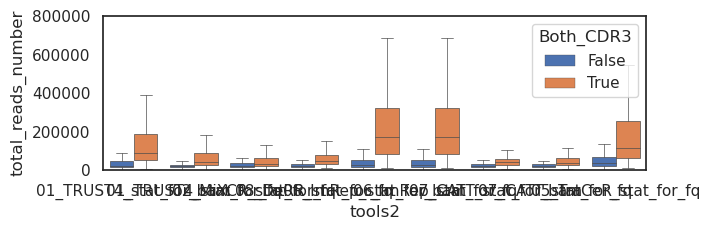

In [28]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(7,2)   
sns.boxplot(x="tools2", y="total_reads_number", 
            hue="Both_CDR3", data=stat_df,
            width=0.8,fliersize=0,saturation=1,linewidth=0.5)
ax.set_ylim(0, 800000)
plt.savefig("./Visualization_results/03_totalreads_Both_CDR3_boxplot_20230523.pdf")

<Figure size 512x384 with 0 Axes>

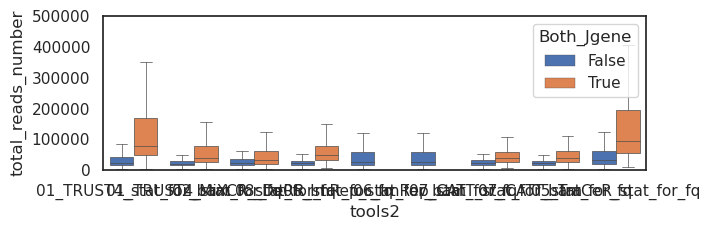

In [29]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(7,2)   
sns.boxplot(x="tools2", y="total_reads_number", 
            hue="Both_Jgene", data=stat_df,
            width=0.8,fliersize=0,saturation=1,linewidth=0.5)
ax.set_ylim(0, 500000) 
plt.savefig("./Visualization_results/03_totalreads_Both_Jgene_boxplot_20230523.pdf")

<Figure size 512x384 with 0 Axes>

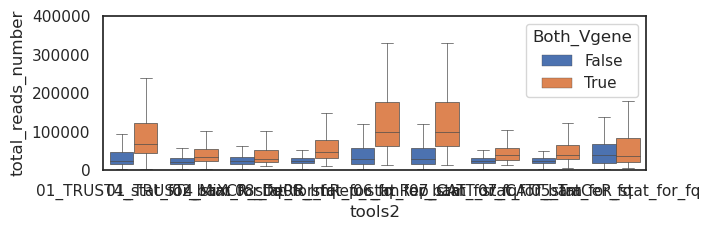

In [30]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(7,2)   
sns.boxplot(x="tools2", y="total_reads_number", 
            hue="Both_Vgene", data=stat_df,
            width=0.8,fliersize=0,saturation=1,linewidth=0.5)
ax.set_ylim(0, 400000)
plt.savefig("./Visualization_results/03_totalreads_Both_Vgene_boxplot_20230523.pdf")

<Figure size 512x384 with 0 Axes>

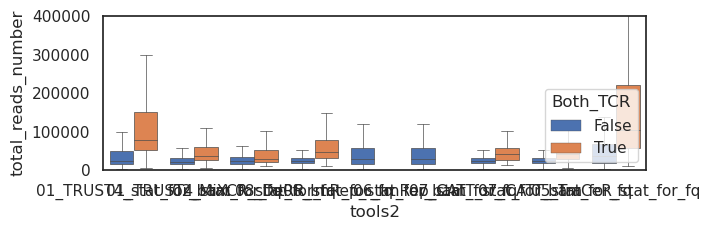

In [31]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(7,2)   
sns.boxplot(x="tools2", y="total_reads_number", 
            hue="Both_TCR", data=stat_df,
            width=0.8,fliersize=0,saturation=1,linewidth=0.5)
ax.set_ylim(0, 400000)
plt.savefig("./Visualization_results/03_totalreads_Both_TCR_boxplot_20230523.pdf")

<Figure size 512x384 with 0 Axes>

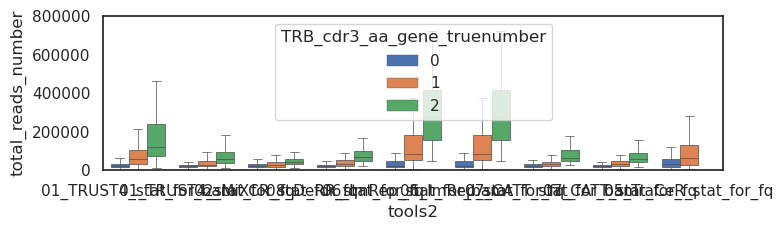

In [32]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(8,2)   
sns.boxplot(x="tools2", y="total_reads_number", 
            hue="TRB_cdr3_aa_gene_truenumber", data=stat_df,
            
            width=0.8,fliersize=0,saturation=1,linewidth=0.5)
ax.set_ylim(0, 800000)
plt.savefig("./Visualization_results/02_totalreads_TRB_CDR3_boxplot_20230523.pdf")

<Figure size 512x384 with 0 Axes>

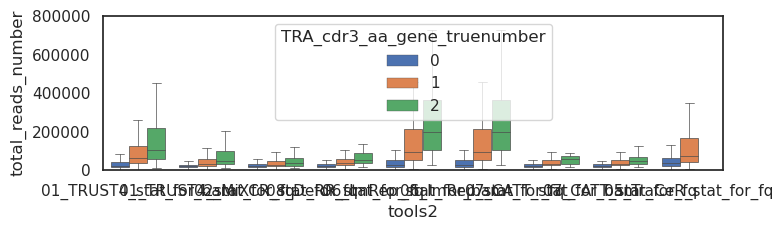

In [33]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(8,2)   
sns.boxplot(x="tools2", y="total_reads_number", 
            hue="TRA_cdr3_aa_gene_truenumber", data=stat_df,
            
            width=0.8,fliersize=0,saturation=1,linewidth=0.5)
ax.set_ylim(0, 800000)
plt.savefig("./Visualization_results/02_totalreads_TRA_CDR3_boxplot_20230523.pdf")

<Figure size 512x384 with 0 Axes>

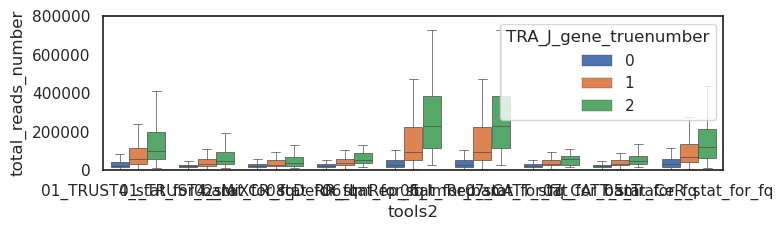

In [34]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(8,2)   
sns.boxplot(x="tools2", y="total_reads_number", 
            hue="TRA_J_gene_truenumber", data=stat_df,
            
            width=0.8,fliersize=0,saturation=1,linewidth=0.5)
ax.set_ylim(0, 800000)
plt.savefig("./Visualization_results/02_totalreads_TRA_Jgene_boxplot_20230523.pdf")

<Figure size 512x384 with 0 Axes>

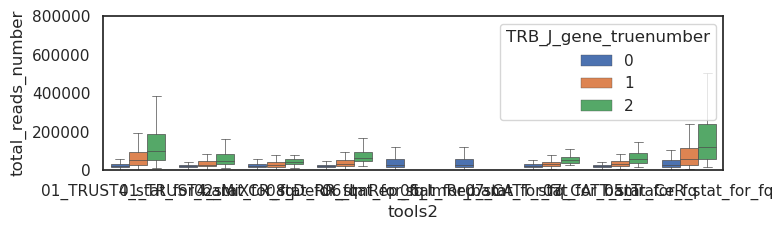

In [35]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(8,2)   
sns.boxplot(x="tools2", y="total_reads_number", 
            hue="TRB_J_gene_truenumber", data=stat_df,
            
            width=0.8,fliersize=0,saturation=1,linewidth=0.5)
ax.set_ylim(0, 800000)
plt.savefig("./Visualization_results/02_totalreads_TRB_Jgene_boxplot_20230523.pdf")

<Figure size 512x384 with 0 Axes>

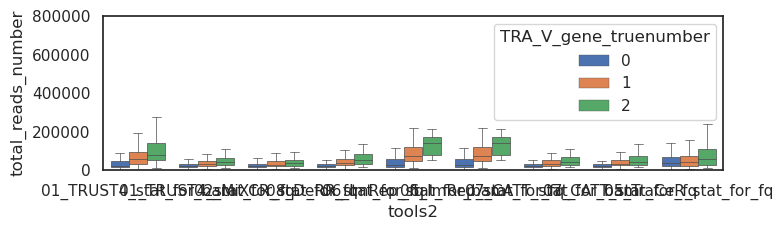

In [36]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(8,2)   
sns.boxplot(x="tools2", y="total_reads_number", 
            hue="TRA_V_gene_truenumber", data=stat_df,
            
            width=0.8,fliersize=0,saturation=1,linewidth=0.5)
ax.set_ylim(0, 800000)
plt.savefig("./Visualization_results/02_totalreads_TRA_Vgene_boxplot_20230523.pdf")

<Figure size 512x384 with 0 Axes>

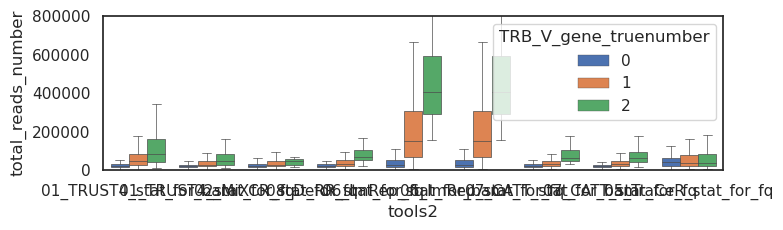

In [37]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(8,2)   
sns.boxplot(x="tools2", y="total_reads_number", 
            hue="TRB_V_gene_truenumber", data=stat_df,
            
            width=0.8,fliersize=0,saturation=1,linewidth=0.5)
ax.set_ylim(0, 800000)
plt.savefig("./Visualization_results/02_totalreads_TRB_Vgene_boxplot_20230523.pdf")

In [38]:
stat_filter_df=stat_df[(stat_df.Both_TCR==True)&(stat_df.LibraryLayout=="SE")&(stat_df.tools=="TRUST4")]

In [39]:
stat_filter2_df=stat_df[(stat_df.LibraryLayout=="SE")&(stat_df.tools=="TRUST4")]

In [40]:
stat_filter_df['sequence_depth']=stat_filter_df['candidate_reads_number']/6

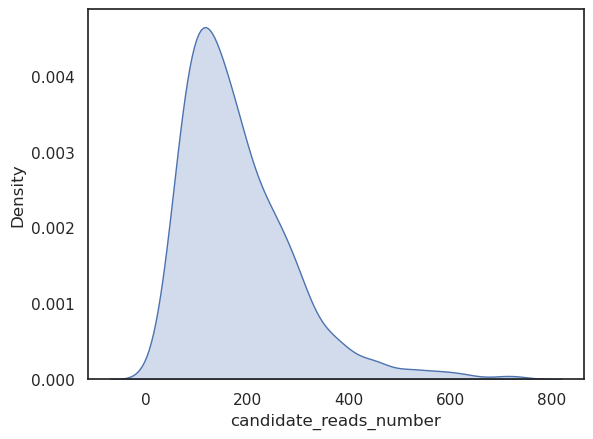

In [41]:
sns.kdeplot(stat_filter_df['candidate_reads_number'],shade=True)
plt.savefig("./Visualization_results/00_TRUST4_SE_True_candidatereads_stat.pdf")

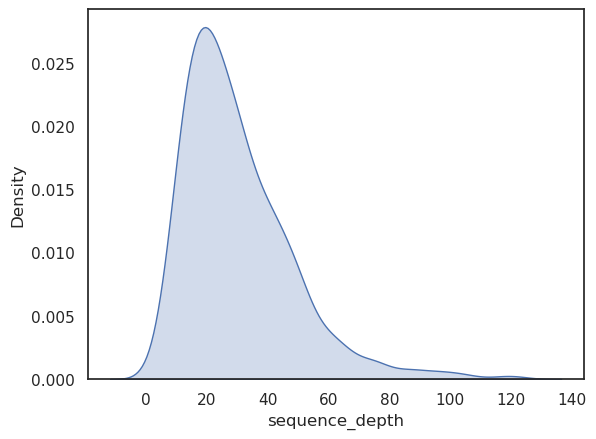

In [42]:
sns.kdeplot(stat_filter_df['sequence_depth'],shade=True)
plt.savefig("./Visualization_results/00_TRUST4_SE_True_candidatereads_stat_depth.pdf")

## CDR3_AA

### 统计

In [43]:
tools_list=['01_TRUST4_stat_for_bam','01_TRUST4_stat_for_fq',
            '02_MiXCR_stat_for_fq','08_DeRR_stat_for_fq',
            '06_ImRep_stat_for_bam','06_ImRep_stat_for_fq',
           '07_CATT_stat_for_bam','07_CATT_stat_for_fq','05_TraCeR_stat_for_fq']

In [44]:
sample_list=['BC09_TUMOR1', 'BC09_TUMOR2', 'BC10_TUMOR1', 'CPIc_C1', 'CPIc_C2',
       'CPIc_C3','CPIc_C4','CPIc_C5','Salmonella_timecourse','KP','KPL_BGB','KPL_Com','KPL_CTR','KPL_PD1']

In [45]:
CDR3_AA_stat_df=pd.DataFrame()
for tools in tools_list:
    stat_df_tmp=pd.read_csv("Statistic_results/"+tools+"_filtered.csv",index_col=0)
    for sample_name in sample_list:
        stat_df_tmp_insample=stat_df_tmp[stat_df_tmp.sample_name==sample_name]
        total_cell_number=len(set(stat_df_tmp_insample.cellbarcode))
        TRA_cdr3_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_CDR3_number>=1)[0])
        TRB_cdr3_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_CDR3_number>=1)[0])
        TRA_cdr3_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_cdr3_aa_gene_truenumber>=1)[0])
        TRB_cdr3_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_cdr3_aa_gene_truenumber>=1)[0])
        TRA_cdr3_cellnumber=len(TRA_cdr3_cellindex_list)
        TRB_cdr3_cellnumber=len(TRB_cdr3_cellindex_list)
        Both_cdr3_cellnumber=len(set(TRA_cdr3_cellindex_list).intersection(TRB_cdr3_cellindex_list))
        TRA_cdr3_True_cellnumber=len(TRA_cdr3_True_cellindex_list)
        TRB_cdr3_True_cellnumber=len(TRB_cdr3_True_cellindex_list)
        Both_cdr3_True_cellnumber=len(set(TRA_cdr3_True_cellindex_list).intersection(TRB_cdr3_True_cellindex_list))
        CDR3_AA_stat_tpm_df=pd.DataFrame(
            {
                'group':['TRA_cdr3_True','TRB_cdr3_True','Both_cdr3_True'],
                'True_cell_number':[TRA_cdr3_True_cellnumber,TRB_cdr3_True_cellnumber,Both_cdr3_True_cellnumber],
                'cell_number':[TRA_cdr3_cellnumber,TRB_cdr3_cellnumber,Both_cdr3_cellnumber]
            })
        CDR3_AA_stat_tpm_df['tools']=tools
        CDR3_AA_stat_tpm_df['sample_name']=sample_name
        CDR3_AA_stat_tpm_df['total_cell_number']=total_cell_number
        CDR3_AA_stat_tpm_df['True_cell_percentage']=(CDR3_AA_stat_tpm_df['True_cell_number']/CDR3_AA_stat_tpm_df['total_cell_number'])*100
        CDR3_AA_stat_tpm_df['sensitivity']=(CDR3_AA_stat_tpm_df['True_cell_number']/CDR3_AA_stat_tpm_df['cell_number'])*100        
        CDR3_AA_stat_tpm_join_df=CDR3_AA_stat_tpm_df.join(sample_info_df.set_index('sample_name'),on='sample_name')
        CDR3_AA_stat_df=CDR3_AA_stat_df.append(CDR3_AA_stat_tpm_join_df)


In [46]:
CDR3_AA_stat_df=CDR3_AA_stat_df.join(software_info_df.set_index('tools'),on='tools')

In [47]:
CDR3_AA_stat_df.index=range(0,CDR3_AA_stat_df.shape[0])

### summary

In [48]:
CDR3_AA_stat_both_df=CDR3_AA_stat_df[CDR3_AA_stat_df.group=="Both_cdr3_True"]

In [49]:
CDR3_AA_stat_both_df.groupby('software').mean()

,True_cell_number,cell_number,total_cell_number,True_cell_percentage,sensitivity
software,,,,,
CATT,107.535714,197.142857,2105.285714,6.075021,40.997527
DeRR,81.142857,84.357143,2105.142857,4.589425,94.167328
ImRep,119.357143,136.785714,3083.857143,10.094482,75.983716
MiXCR,28.000000,43.285714,3084.357143,1.158621,62.850373
TRUST4,530.000000,1180.357143,3084.714286,29.686483,46.287210
TraCeR,84.142857,1286.642857,2322.785714,4.984347,7.645151


### boxplot

<Figure size 512x384 with 0 Axes>

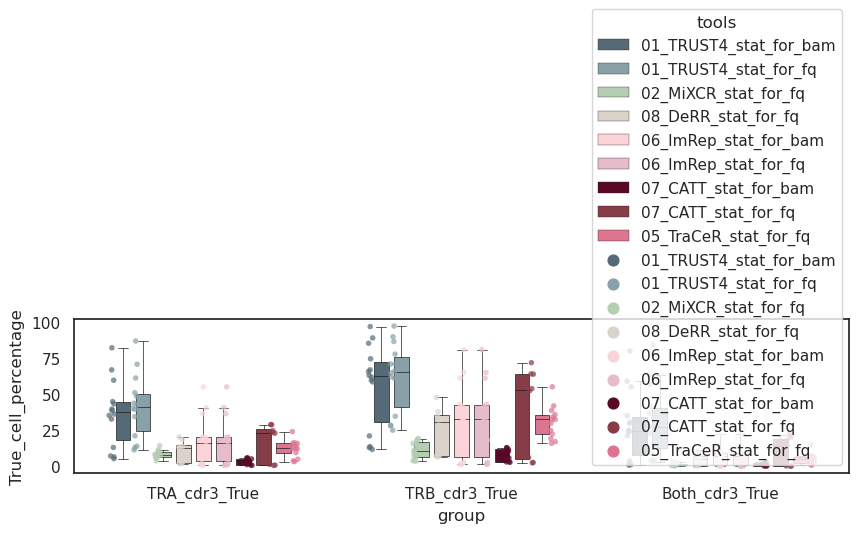

In [50]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(10,2)
sns.boxplot(x="group", y="True_cell_percentage", 
            hue="tools", data=CDR3_AA_stat_df,
            width=0.7,fliersize=0,saturation=1,linewidth=0.5,
            palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           })
sns.stripplot(x = "group",y = "True_cell_percentage",hue="tools",
              data = CDR3_AA_stat_df,dodge=True,
              #color="black",
              size = 4,
              alpha = 0.7,
              palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           }
)
adjust_box_widths(fig, 0.75)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_CDR3_AA_percision_boxplot_bygroup_20230721.pdf")

<Figure size 512x384 with 0 Axes>

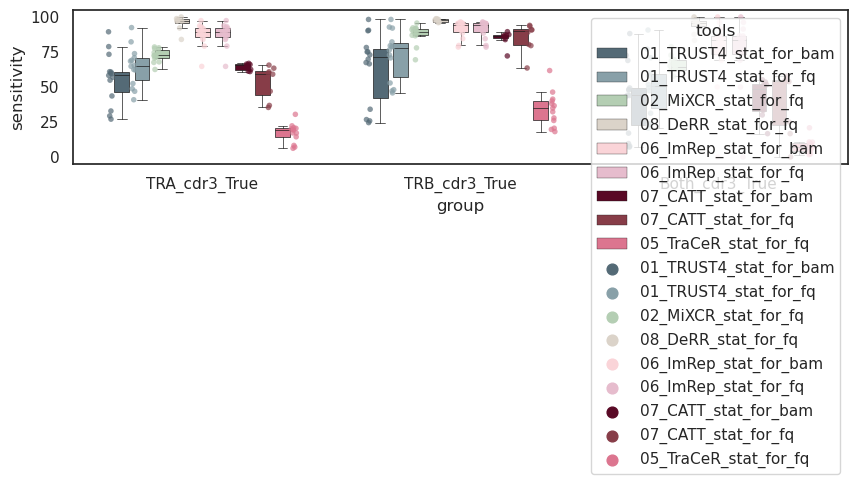

In [51]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(10,2)
sns.boxplot(x="group", y="sensitivity", 
            hue="tools", data=CDR3_AA_stat_df,
            width=0.7,fliersize=0,saturation=1,linewidth=0.5,
            palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           })
sns.stripplot(x = "group",y = "sensitivity",hue="tools",
              data = CDR3_AA_stat_df,dodge=True,
              #color="black",
              size = 4,
              alpha = 0.7,
              palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           }
)
adjust_box_widths(fig, 0.75)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_CDR3_AA_sensitivity_boxplot_bygroup_20230721.pdf")

### human vs mouse

<Figure size 512x384 with 0 Axes>

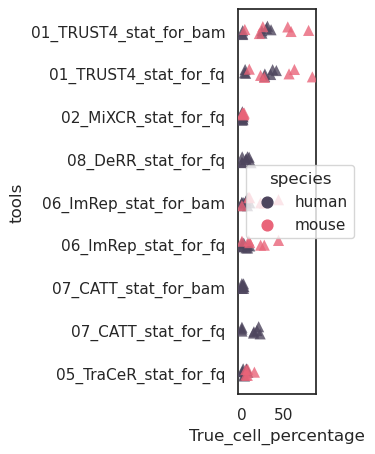

In [52]:
Both_CDR3_AA_stat_df=CDR3_AA_stat_df[CDR3_AA_stat_df.group=='Both_cdr3_True']
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "True_cell_percentage",
              hue="species",
              data = Both_CDR3_AA_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
           'human':'#4D455D',
           'mouse':'#E96479'
        },
              s=8, 
              marker="^"
)
#adjust_box_widths(fig, 0.8)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_CDR3_AA_percision_scatterplot_byspecies_20230721.pdf")

<Figure size 512x384 with 0 Axes>

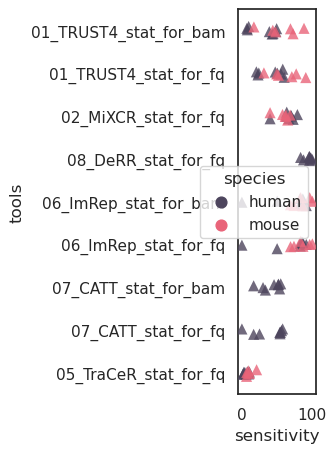

In [53]:
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "sensitivity",
              hue="species",
              data = Both_CDR3_AA_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
           'human':'#4D455D',
           'mouse':'#E96479'
        },
              s=8, 
              marker="^"
)
#adjust_box_widths(fig, 0.8)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_CDR3_AA_sensitivity_scatterplot_byspecies_20230721.pdf")

### PE vs SE

<Figure size 512x384 with 0 Axes>

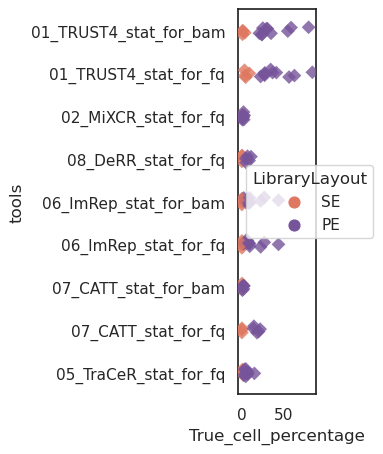

In [54]:
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "True_cell_percentage",
              hue="LibraryLayout",
              data = Both_CDR3_AA_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
               'PE':'#76549A',
               'SE':'#DF7861'
           },
              s=7, 
              marker="D"
)
#adjust_box_widths(fig, 0.8)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_CDR3_AA_percision_scatterplot_byLibraryLayout_20230721.pdf")

<Figure size 512x384 with 0 Axes>

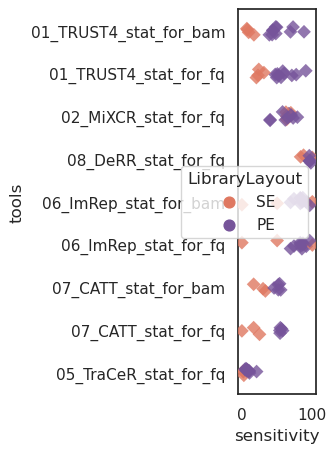

In [55]:
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "sensitivity",
              hue="LibraryLayout",
              data = Both_CDR3_AA_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
               'PE':'#76549A',
               'SE':'#DF7861'
           },
              s=7, 
              marker="D"
)
#adjust_box_widths(fig, 0.8)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_CDR3_AA_sensitivity_scatterplot_byLibraryLayout_20230721.pdf")

## V gene

### 统计

In [56]:
tools_list=['01_TRUST4_stat_for_bam','01_TRUST4_stat_for_fq',
            '02_MiXCR_stat_for_fq','08_DeRR_stat_for_fq',
            '06_ImRep_stat_for_bam','06_ImRep_stat_for_fq',
           '07_CATT_stat_for_bam','07_CATT_stat_for_fq','05_TraCeR_stat_for_fq']

In [57]:
sample_list=['BC09_TUMOR1', 'BC09_TUMOR2', 'BC10_TUMOR1', 'CPIc_C1', 'CPIc_C2',
       'CPIc_C3','CPIc_C4','CPIc_C5','Salmonella_timecourse','KP','KPL_BGB','KPL_Com','KPL_CTR','KPL_PD1']

In [58]:
Vgene_stat_df=pd.DataFrame()
for tools in tools_list:
    stat_df_tmp=pd.read_csv("Statistic_results/"+tools+"_filtered.csv",index_col=0)
    for sample_name in sample_list:
        stat_df_tmp_insample=stat_df_tmp[stat_df_tmp.sample_name==sample_name]
        total_cell_number=len(set(stat_df_tmp_insample.cellbarcode))
        TRA_Vgene_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_V_gene_number>=1)[0])
        TRB_Vgene_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_V_gene_number>=1)[0])        
        TRA_Vgene_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_V_gene_truenumber>=1)[0])
        TRB_Vgene_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_V_gene_truenumber>=1)[0])
        TRA_Vgene_cellnumber=len(TRA_Vgene_cellindex_list)
        TRB_Vgene_cellnumber=len(TRB_Vgene_cellindex_list)
        Both_Vgene_cellnumber=len(set(TRA_Vgene_cellindex_list).intersection(TRB_Vgene_cellindex_list))
        TRA_Vgene_True_cellnumber=len(TRA_Vgene_True_cellindex_list)
        TRB_Vgene_True_cellnumber=len(TRB_Vgene_True_cellindex_list)
        Both_Vgene_True_cellnumber=len(set(TRA_Vgene_True_cellindex_list).intersection(TRB_Vgene_True_cellindex_list))
        Vgene_stat_tpm_df=pd.DataFrame(
            {
                'group':['TRA_Vgene_True','TRB_Vgene_True','Both_Vgene_True'],
                'True_cell_number':[TRA_Vgene_True_cellnumber,TRB_Vgene_True_cellnumber,Both_Vgene_True_cellnumber],
                'cell_number':[TRA_Vgene_cellnumber,TRB_Vgene_cellnumber,Both_Vgene_cellnumber]
            })
        Vgene_stat_tpm_df['tools']=tools
        Vgene_stat_tpm_df['sample_name']=sample_name
        Vgene_stat_tpm_df['total_cell_number']=total_cell_number
        Vgene_stat_tpm_df['True_cell_percentage']=(Vgene_stat_tpm_df['True_cell_number']/Vgene_stat_tpm_df['total_cell_number'])*100
        Vgene_stat_tpm_df['sensitivity']=(Vgene_stat_tpm_df['True_cell_number']/Vgene_stat_tpm_df['cell_number'])*100         
        Vgene_stat_tpm_join_df=Vgene_stat_tpm_df.join(sample_info_df.set_index('sample_name'),on='sample_name')
        Vgene_stat_df=Vgene_stat_df.append(Vgene_stat_tpm_join_df)

In [59]:
Vgene_stat_df=Vgene_stat_df.join(software_info_df.set_index('tools'),on='tools')

In [60]:
Vgene_stat_df.index=range(0,Vgene_stat_df.shape[0])

### summary

In [61]:
Vgene_stat_both_df=Vgene_stat_df[Vgene_stat_df.group=="Both_Vgene_True"]

In [62]:
Vgene_stat_both_df.groupby('software').mean()

,True_cell_number,cell_number,total_cell_number,True_cell_percentage,sensitivity
software,,,,,
CATT,91.357143,197.142857,2105.285714,5.172642,40.938258
DeRR,58.857143,84.357143,2105.142857,3.321551,70.180130
ImRep,8.357143,136.785714,3083.857143,0.386893,4.065807
MiXCR,16.928571,43.285714,3084.357143,0.732804,42.649886
TRUST4,426.035714,1180.357143,3084.714286,17.523688,30.990640
TraCeR,491.714286,1286.642857,2322.785714,17.446113,30.755337


### boxplot

<Figure size 512x384 with 0 Axes>

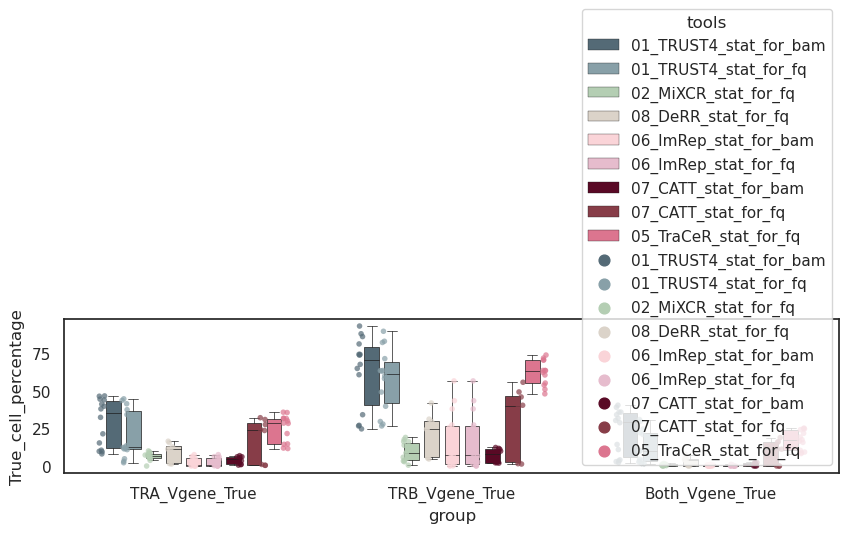

In [63]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(10,2)
sns.boxplot(x="group", y="True_cell_percentage", 
            hue="tools", data=Vgene_stat_df,
            width=0.7,fliersize=0,saturation=1,linewidth=0.5,
            palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           })
sns.stripplot(x = "group",y = "True_cell_percentage",hue="tools",
              data = Vgene_stat_df,dodge=True,
              #color="black",
              size = 4,
              alpha = 0.7,
              palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           }
)
adjust_box_widths(fig, 0.75)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Vgene_percision_boxplot_bygroups.pdf")

<Figure size 512x384 with 0 Axes>

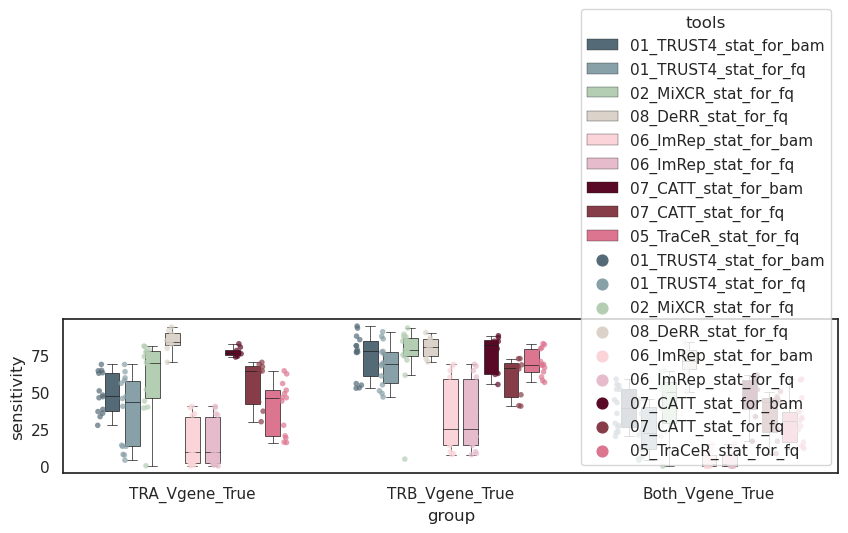

In [64]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(10,2)
sns.boxplot(x="group", y="sensitivity", 
            hue="tools", data=Vgene_stat_df,
            width=0.7,fliersize=0,saturation=1,linewidth=0.5,
            palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           })
sns.stripplot(x = "group",y = "sensitivity",hue="tools",
              data = Vgene_stat_df,dodge=True,
              #color="black",
              size = 4,
              alpha = 0.7,
              palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           }
)
adjust_box_widths(fig, 0.75)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Vgene_sensitivity_boxplot_bygroups.pdf")

### human vs mouse

In [65]:
Both_Vgene_stat_df=Vgene_stat_df[Vgene_stat_df.group=='Both_Vgene_True']

<Figure size 512x384 with 0 Axes>

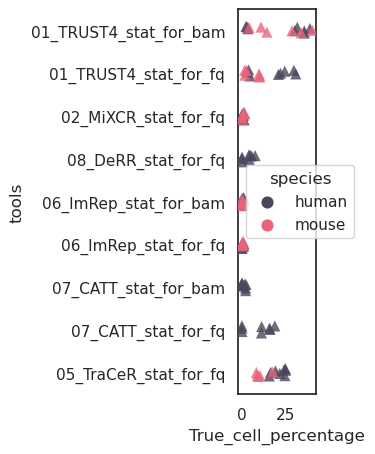

In [66]:
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "True_cell_percentage",
              hue="species",
              data = Both_Vgene_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
           'human':'#4D455D',
           'mouse':'#E96479'
        },
              s=8, 
              marker="^"
)
#adjust_box_widths(fig, 0.8)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Vgene_percision_scatterplot_byspecies_20230721.pdf")

<Figure size 512x384 with 0 Axes>

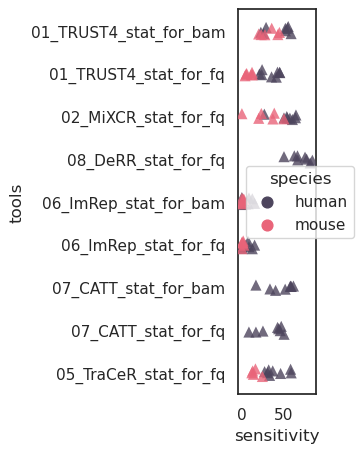

In [67]:
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "sensitivity",
              hue="species",
              data = Both_Vgene_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
           'human':'#4D455D',
           'mouse':'#E96479'
        },
              s=8, 
              marker="^"
)
#adjust_box_widths(fig, 0.8)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Vgene_sensitivity_scatterplot_byspecies_20230721.pdf")

### PE vs SE

<Figure size 512x384 with 0 Axes>

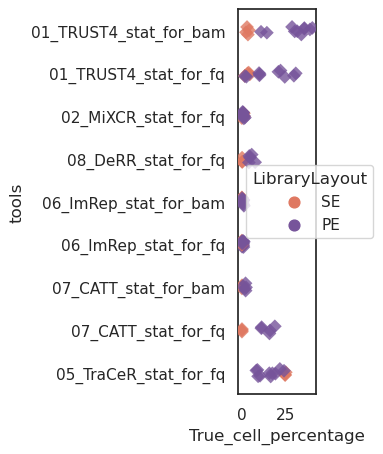

In [68]:
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "True_cell_percentage",
              hue="LibraryLayout",
              data = Both_Vgene_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
               'PE':'#76549A',
               'SE':'#DF7861'
           },
              s=7, 
              marker="D"
)
#adjust_box_widths(fig, 0.8)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Vgene_percision_scatterplot_byLibraryLayout_20230721.pdf")

<Figure size 512x384 with 0 Axes>

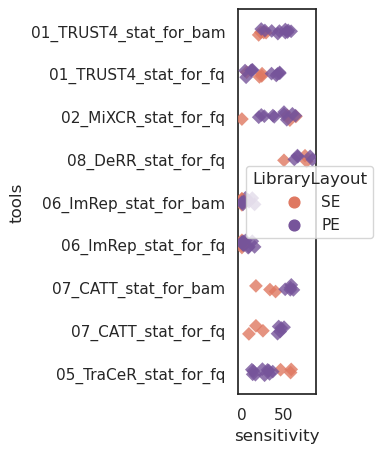

In [69]:
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "sensitivity",
              hue="LibraryLayout",
              data = Both_Vgene_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
               'PE':'#76549A',
               'SE':'#DF7861'
           },
              s=7, 
              marker="D"
)
#adjust_box_widths(fig, 0.8)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Vgene_sensitivity_scatterplot_byLibraryLayout_20230721.pdf")

## J gene

### 统计

In [70]:
tools_list=['01_TRUST4_stat_for_bam','01_TRUST4_stat_for_fq',
            '02_MiXCR_stat_for_fq','08_DeRR_stat_for_fq',
            '06_ImRep_stat_for_bam','06_ImRep_stat_for_fq',
           '07_CATT_stat_for_bam','07_CATT_stat_for_fq','05_TraCeR_stat_for_fq']

In [71]:
sample_list=['BC09_TUMOR1', 'BC09_TUMOR2', 'BC10_TUMOR1', 'CPIc_C1', 'CPIc_C2',
       'CPIc_C3','CPIc_C4','CPIc_C5','Salmonella_timecourse','KP','KPL_BGB','KPL_Com','KPL_CTR','KPL_PD1']

In [72]:
Jgene_stat_df=pd.DataFrame()
for tools in tools_list:
    stat_df_tmp=pd.read_csv("Statistic_results/"+tools+"_filtered.csv",index_col=0)
    for sample_name in sample_list:
        stat_df_tmp_insample=stat_df_tmp[stat_df_tmp.sample_name==sample_name]
        total_cell_number=len(set(stat_df_tmp_insample.cellbarcode))
        TRA_Jgene_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_J_gene_number>=1)[0])
        TRB_Jgene_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_J_gene_number>=1)[0])        
        TRA_Jgene_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_J_gene_truenumber>=1)[0])
        TRB_Jgene_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_J_gene_truenumber>=1)[0])
        TRA_Jgene_cellnumber=len(TRA_Jgene_cellindex_list)
        TRB_Jgene_cellnumber=len(TRB_Jgene_cellindex_list)
        Both_Jgene_cellnumber=len(set(TRA_Jgene_cellindex_list).intersection(TRB_Jgene_cellindex_list))
        TRA_Jgene_True_cellnumber=len(TRA_Jgene_True_cellindex_list)
        TRB_Jgene_True_cellnumber=len(TRB_Jgene_True_cellindex_list)
        Both_Jgene_True_cellnumber=len(set(TRA_Jgene_True_cellindex_list).intersection(TRB_Jgene_True_cellindex_list))
        Jgene_stat_tpm_df=pd.DataFrame(
            {
                'group':['TRA_Jgene_True','TRB_Jgene_True','Both_Jgene_True'],
                'True_cell_number':[TRA_Jgene_True_cellnumber,TRB_Jgene_True_cellnumber,Both_Jgene_True_cellnumber],
                'cell_number':[TRA_Jgene_cellnumber,TRB_Jgene_cellnumber,Both_Jgene_cellnumber]
            })
        Jgene_stat_tpm_df['tools']=tools
        Jgene_stat_tpm_df['sample_name']=sample_name
        Jgene_stat_tpm_df['total_cell_number']=total_cell_number
        Jgene_stat_tpm_df['True_cell_percentage']=(Jgene_stat_tpm_df['True_cell_number']/Jgene_stat_tpm_df['total_cell_number'])*100
        Jgene_stat_tpm_df['sensitivity']=(Jgene_stat_tpm_df['True_cell_number']/Jgene_stat_tpm_df['cell_number'])*100         
        Jgene_stat_tpm_join_df=Jgene_stat_tpm_df.join(sample_info_df.set_index('sample_name'),on='sample_name')
        Jgene_stat_df=Jgene_stat_df.append(Jgene_stat_tpm_join_df)

In [73]:
Jgene_stat_df=Jgene_stat_df.join(software_info_df.set_index('tools'),on='tools')

In [74]:
Jgene_stat_df.index=range(0,Jgene_stat_df.shape[0])

### summary

In [75]:
Jgene_stat_both_df=Jgene_stat_df[Jgene_stat_df.group=="Both_Jgene_True"]

In [76]:
Jgene_stat_both_df.groupby('software').mean()

,True_cell_number,cell_number,total_cell_number,True_cell_percentage,sensitivity
software,,,,,
CATT,130.428571,197.142857,2105.285714,7.378031,52.151573
DeRR,82.071429,84.357143,2105.142857,4.643636,96.322384
ImRep,0.000000,136.785714,3083.857143,0.000000,0.000000
MiXCR,27.785714,43.285714,3084.357143,1.169518,64.646923
TRUST4,614.750000,1180.357143,3084.714286,32.340199,52.671074
TraCeR,268.857143,1286.642857,2322.785714,16.020992,24.668278


### boxplot

<Figure size 512x384 with 0 Axes>

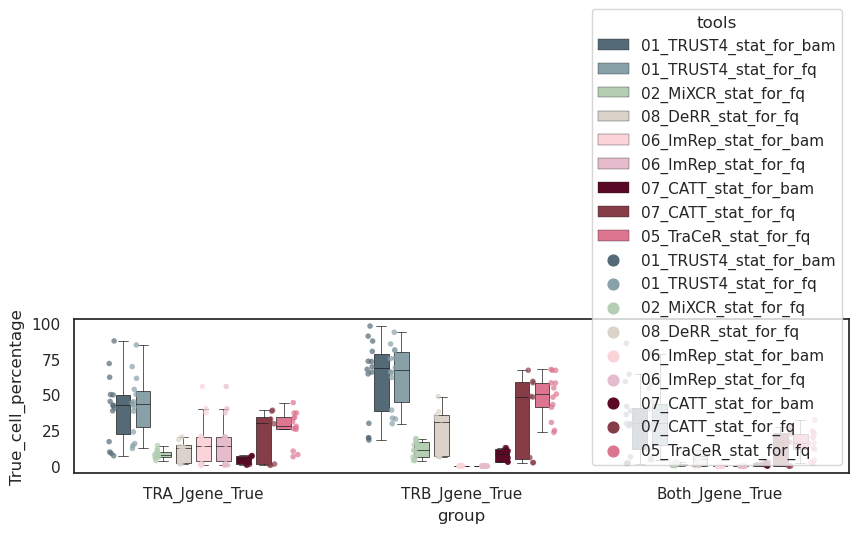

In [77]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(10,2)
sns.boxplot(x="group", y="True_cell_percentage", 
            hue="tools", data=Jgene_stat_df,
            width=0.7,fliersize=0,saturation=1,linewidth=0.5,
            palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           })
sns.stripplot(x = "group",y = "True_cell_percentage",hue="tools",
              data = Jgene_stat_df,dodge=True,
              #color="black",
              size = 4,
              alpha = 0.7,
              palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           }
)
adjust_box_widths(fig, 0.75)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Jgene_percision_boxplot_bygroup.pdf")

<Figure size 512x384 with 0 Axes>

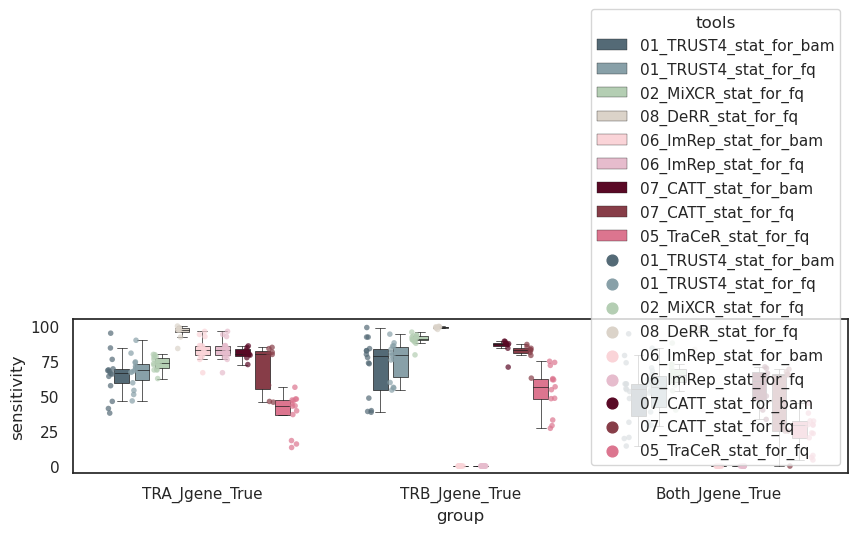

In [78]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(10,2)
sns.boxplot(x="group", y="sensitivity", 
            hue="tools", data=Jgene_stat_df,
            width=0.7,fliersize=0,saturation=1,linewidth=0.5,
            palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           })
sns.stripplot(x = "group",y = "sensitivity",hue="tools",
              data = Jgene_stat_df,dodge=True,
              #color="black",
              size = 4,
              alpha = 0.7,
              palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           }
)
adjust_box_widths(fig, 0.75)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Jgene_sensitivity_boxplot_bygroup.pdf")

### human vs mouse

<Figure size 512x384 with 0 Axes>

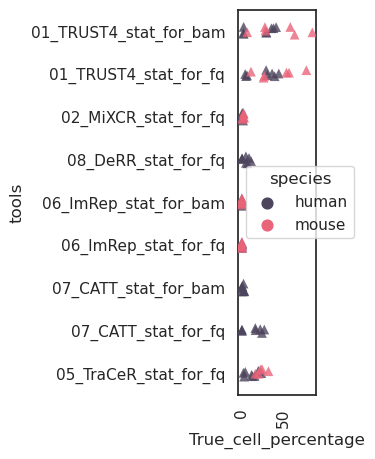

In [79]:
Both_Jgene_stat_df=Jgene_stat_df[Jgene_stat_df.group=='Both_Jgene_True']
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "True_cell_percentage",
              hue="species",
              data = Both_Jgene_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
           'human':'#4D455D',
           'mouse':'#E96479'
        },
              s=7, 
              marker="^"
)
#adjust_box_widths(fig, 0.8)
plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Jgene_percision_scatterplot_byspecies_20230721.pdf")

<Figure size 512x384 with 0 Axes>

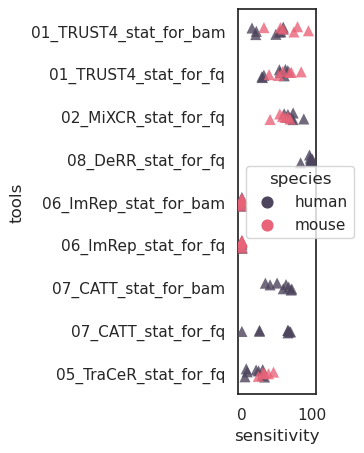

In [80]:
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "sensitivity",
              hue="species",
              data = Both_Jgene_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
           'human':'#4D455D',
           'mouse':'#E96479'
        },
              s=8, 
              marker="^"
)
#adjust_box_widths(fig, 0.8)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Jgene_sensitivity_scatterplot_byspecies_20230721.pdf")

### PE vs SE

<Figure size 512x384 with 0 Axes>

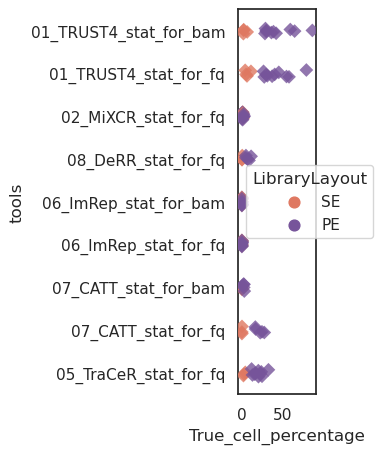

In [81]:
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "True_cell_percentage",
              hue="LibraryLayout",
              data = Both_Jgene_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
               'PE':'#76549A',
               'SE':'#DF7861'
           },
              s=7, 
              marker="D"
)
#adjust_box_widths(fig, 0.8)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Jgene_percision_scatterplot_byLibraryLayout_20230721.pdf")

<Figure size 512x384 with 0 Axes>

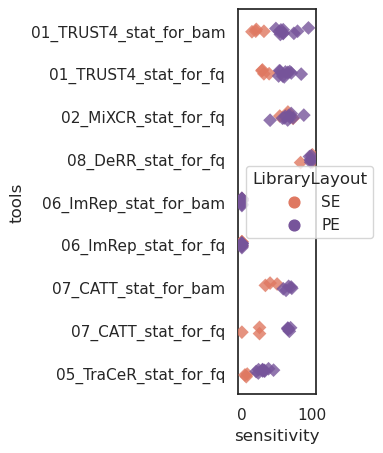

In [82]:
plt.figure(dpi=80)
fig,ax=plt.subplots()
fig.set_size_inches(1,5)
sns.set(style="white")
sns.stripplot(y = "tools",
              x = "sensitivity",
              hue="LibraryLayout",
              data = Both_Jgene_stat_df,dodge=False,
              #color="black",
              #size = 4,
              alpha = 0.8,
              palette={
               'PE':'#76549A',
               'SE':'#DF7861'
           },
              s=7, 
              marker="D"
)
#adjust_box_widths(fig, 0.8)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_Jgene_sensitivity_scatterplot_byLibraryLayout_20230721.pdf")

## CDR3_AA+V gene+ J gene

### 统计

In [83]:
tools_list=['01_TRUST4_stat_for_bam','01_TRUST4_stat_for_fq',
            '02_MiXCR_stat_for_fq','08_DeRR_stat_for_fq',
            '06_ImRep_stat_for_bam','06_ImRep_stat_for_fq',
           '07_CATT_stat_for_bam','07_CATT_stat_for_fq','05_TraCeR_stat_for_fq']

In [84]:
sample_list=['BC09_TUMOR1', 'BC09_TUMOR2', 'BC10_TUMOR1', 'CPIc_C1', 'CPIc_C2',
       'CPIc_C3','CPIc_C4','CPIc_C5','Salmonella_timecourse','KP','KPL_BGB','KPL_Com','KPL_CTR','KPL_PD1']

In [85]:
fullTCR_stat_df=pd.DataFrame()
for tools in tools_list:
    stat_df_tmp=pd.read_csv("Statistic_results/"+tools+"_filtered.csv",index_col=0)
    for sample_name in sample_list:
        stat_df_tmp_insample=stat_df_tmp[stat_df_tmp.sample_name==sample_name]
        total_cell_number=len(set(stat_df_tmp_insample.cellbarcode))
        TRA_Vgene_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_V_gene_number>=1)[0])
        TRB_Vgene_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_V_gene_number>=1)[0])
        TRA_cdr3_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_CDR3_number>=1)[0])
        TRB_cdr3_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_CDR3_number>=1)[0])
        TRA_Jgene_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_J_gene_number>=1)[0])
        TRB_Jgene_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_J_gene_number>=1)[0])       
        TRA_Vgene_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_V_gene_truenumber>=1)[0])
        TRB_Vgene_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_V_gene_truenumber>=1)[0])
        TRA_cdr3_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_cdr3_aa_gene_truenumber>=1)[0])
        TRB_cdr3_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_cdr3_aa_gene_truenumber>=1)[0])
        TRA_Jgene_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRA_J_gene_truenumber>=1)[0])
        TRB_Jgene_True_cellindex_list=list(np.where(
            stat_df_tmp_insample.TRB_J_gene_truenumber>=1)[0])
        TRA_fullTCR_True_cellindex_list=set(TRA_cdr3_True_cellindex_list).intersection(TRA_Vgene_True_cellindex_list).intersection(TRA_Jgene_True_cellindex_list)
        TRB_fullTCR_True_cellindex_list=set(TRB_cdr3_True_cellindex_list).intersection(TRB_Vgene_True_cellindex_list).intersection(TRB_Jgene_True_cellindex_list)        
        TRA_fullTCR_True_cellnumber=len(TRA_fullTCR_True_cellindex_list)
        TRB_fullTCR_True_cellnumber=len(TRB_fullTCR_True_cellindex_list)
        Both_fullTCR_True_cellnumber=len(set(TRA_fullTCR_True_cellindex_list).intersection(TRB_fullTCR_True_cellindex_list))
        TRA_fullTCR_cellindex_list=set(TRA_cdr3_cellindex_list).intersection(TRA_Vgene_cellindex_list).intersection(TRA_Jgene_cellindex_list)
        TRB_fullTCR_cellindex_list=set(TRB_cdr3_cellindex_list).intersection(TRB_Vgene_cellindex_list).intersection(TRB_Jgene_cellindex_list)        
        TRA_fullTCR_cellnumber=len(TRA_fullTCR_cellindex_list)
        TRB_fullTCR_cellnumber=len(TRB_fullTCR_cellindex_list)
        Both_fullTCR_cellnumber=len(set(TRA_fullTCR_cellindex_list).intersection(TRB_fullTCR_cellindex_list))        
        fullTCR_stat_tpm_df=pd.DataFrame(
            {
                'group':['TRA_fullTCR_True','TRB_fullTCR_True','Both_fullTCR_True'],
                'True_cell_number':[TRA_fullTCR_True_cellnumber,TRB_fullTCR_True_cellnumber,Both_fullTCR_True_cellnumber],
                'cell_number':[TRA_fullTCR_cellnumber,TRB_fullTCR_cellnumber,Both_fullTCR_cellnumber]
            })
        fullTCR_stat_tpm_df['tools']=tools
        fullTCR_stat_tpm_df['sample_name']=sample_name
        fullTCR_stat_tpm_df['total_cell_number']=total_cell_number
        fullTCR_stat_tpm_df['True_cell_percentage']=(fullTCR_stat_tpm_df['True_cell_number']/fullTCR_stat_tpm_df['total_cell_number'])*100
        fullTCR_stat_tpm_df['sensitivity']=(fullTCR_stat_tpm_df['True_cell_number']/fullTCR_stat_tpm_df['cell_number'])*100 
        fullTCR_stat_tpm_join_df=fullTCR_stat_tpm_df.join(sample_info_df.set_index('sample_name'),on='sample_name')
        fullTCR_stat_df=fullTCR_stat_df.append(fullTCR_stat_tpm_join_df)

In [86]:
fullTCR_stat_df=fullTCR_stat_df.join(software_info_df.set_index('tools'),on='tools')

In [87]:
fullTCR_stat_df.index=range(0,fullTCR_stat_df.shape[0])

### summary

In [88]:
fullTCR_stat_both_df=fullTCR_stat_df[fullTCR_stat_df.group=="Both_fullTCR_True"]

In [89]:
fullTCR_stat_both_df.groupby('software').mean()

,True_cell_number,cell_number,total_cell_number,True_cell_percentage,sensitivity
software,,,,,
CATT,56.892857,197.142857,2105.285714,3.223473,26.852082
DeRR,58.000000,84.357143,2105.142857,3.271923,68.128538
ImRep,0.000000,136.785714,3083.857143,0.000000,0.000000
MiXCR,16.571429,43.285714,3084.357143,0.724404,42.007578
TRUST4,289.250000,1180.357143,3084.714286,12.922985,20.982484
TraCeR,60.214286,1286.642857,2322.785714,3.063368,4.801182


### boxplot

<Figure size 512x384 with 0 Axes>

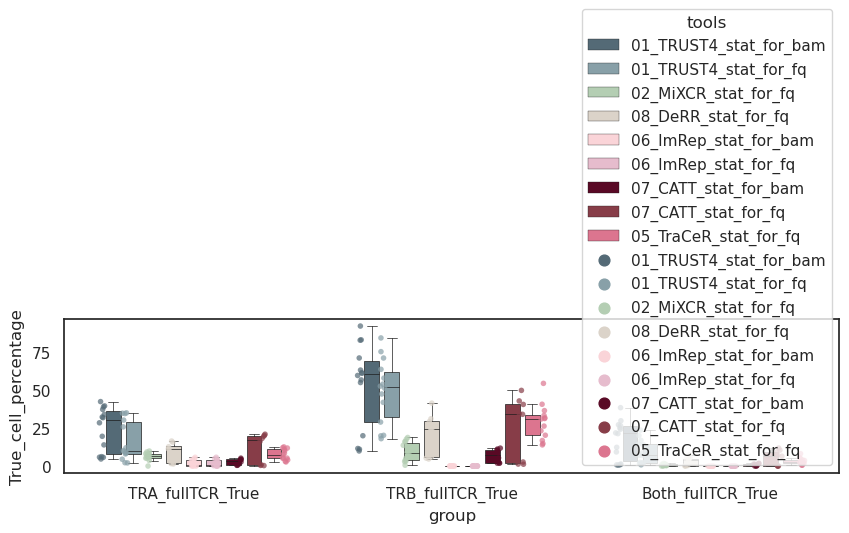

In [90]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(10,2)
sns.boxplot(x="group", y="True_cell_percentage", 
            hue="tools", data=fullTCR_stat_df,
            width=0.7,fliersize=0,saturation=1,linewidth=0.5,
            palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           })
sns.stripplot(x = "group",y = "True_cell_percentage",hue="tools",
              data = fullTCR_stat_df,dodge=True,
              #color="black",
              size = 4,
              alpha = 0.7,
              palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           }
)
adjust_box_widths(fig, 0.75)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_fullTCR_percision_boxplot_bygroups_20230721.pdf")

<Figure size 512x384 with 0 Axes>

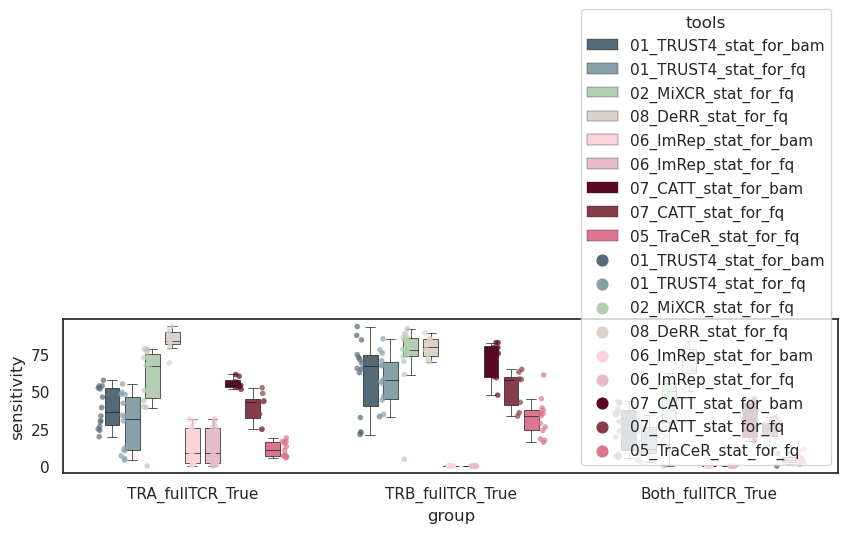

In [91]:
plt.figure(dpi=80)
sns.set(style="white")
fig,ax=plt.subplots()
fig.set_size_inches(10,2)
sns.boxplot(x="group", y="sensitivity", 
            hue="tools", data=fullTCR_stat_df,
            width=0.7,fliersize=0,saturation=1,linewidth=0.5,
            palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           })
sns.stripplot(x = "group",y = "sensitivity",hue="tools",
              data = fullTCR_stat_df,dodge=True,
              #color="black",
              size = 4,
              alpha = 0.7,
              palette={
               '01_TRUST4_stat_for_bam':'#546a76',
                '01_TRUST4_stat_for_fq':'#88a0a8',
                '02_MiXCR_stat_for_fq':'#b4ceb3',
                '08_DeRR_stat_for_fq':'#dbd3c9',
                '06_ImRep_stat_for_bam':'#fad4d8',
                '06_ImRep_stat_for_fq':'#e6bccd',
                '07_CATT_stat_for_bam':'#590925',
                '07_CATT_stat_for_fq':'#873d48',
                '05_TraCeR_stat_for_fq':'#dc758f'
           }
)
adjust_box_widths(fig, 0.75)
#plt.xticks(rotation=90)
plt.savefig("./Visualization_results/01_fullTCR_sensitivity_bygroups_20230721.pdf")